In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Standard Case

In [3]:
n = 1000
theta = 10
G = np.random.normal(size=(n, n))
X = (G + np.transpose(G)) / (2*n)**0.5
u = np.random.rand(n)
u = u / np.linalg.norm(u)
u = u[None, :]
X_tilda = X + theta * u * u.transpose()

eigvals1, eigvecs1 = np.linalg.eig(X)
eigvals2, eigvecs2 = np.linalg.eig(X_tilda)

Q = eigvecs1
QT = Q.transpose()
w = np.matmul(QT, u[0, :])

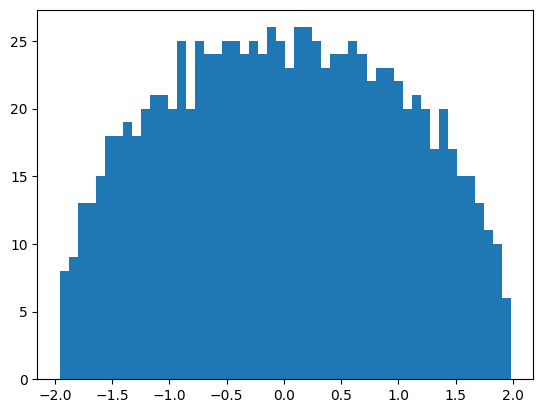

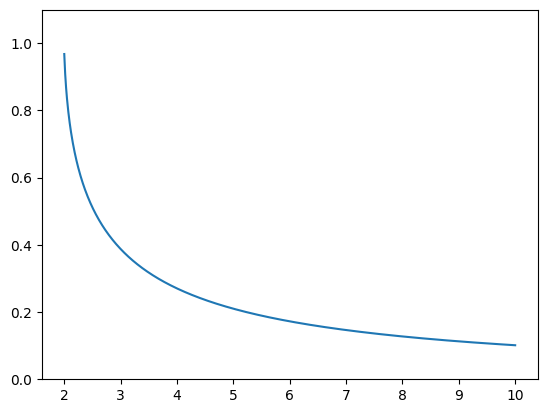

In [4]:
plt.hist(eigvals1, bins=50)
plt.show()
x = np.linspace(2.0001, 10, 1000)
def gx(x, n, lambdas, ws):
    sum = 0
    for i in range(n):
        sum += (ws[i])**2 / (x - lambdas[i])
    return sum
y = [gx(x[i], n, eigvals1, w) for i in range(len(x))]
plt.plot(x, y)
plt.ylim(top=1.1, bottom=0)
plt.show()

## Uniform distribution

In [5]:
def gx(x, n, lambdas, ws):
    sum = 0
    for i in range(n):
        sum += (ws[i])**2 / (x - lambdas[i])
    return sum


def get_exp_gx(trials, n, x, multi=True):
    ys = []
    for _ in range(trials):
        G = np.random.normal(size=(n, n))
        _, eigvecsG = np.linalg.eigh(G)
        lambdas = (np.random.rand(n) - 0.5) * 4
        Lambda = np.diag(lambdas)
        X = eigvecsG.transpose()@Lambda@eigvecsG
        u = np.random.rand(n)
        u = u / np.linalg.norm(u)
        u = u[None, :]
        eigvals1, eigvecs1 = np.linalg.eig(X)
        Q = eigvecs1
        QT = Q.transpose()
        w = np.matmul(QT, u[0, :])
        y = [gx(x[i], n, eigvals1, w) for i in range(len(x))]
        ys.append(y)
    y_theoretical = (np.log(x+2) - np.log(x-2)) / 4
    if multi:
        return ys, y_theoretical
    else:   
        y = np.mean(np.array(ys), axis=0)
    return y, y_theoretical

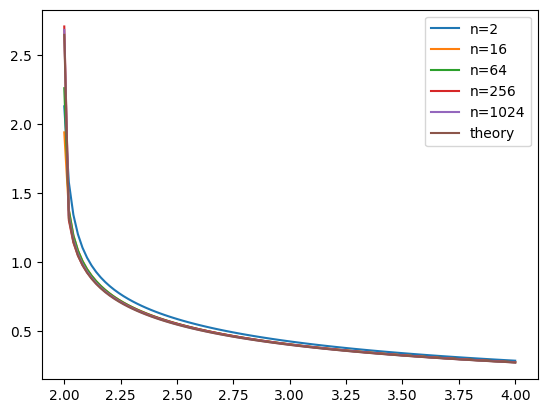

In [6]:
trails = 50
ns = [2, 16, 64, 256, 1024]
x = np.linspace(2.0001, 4, 100)
for n in ns:
    y_e, y_t = get_exp_gx(trails, n, x, multi=False)
    plt.plot(x, y_e, label=f'n={n}')
plt.plot(x, y_t, label='theory')
plt.legend()
plt.show()

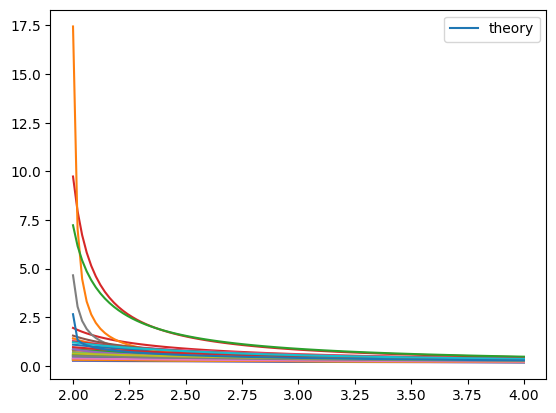

In [7]:
trails = 50
n = 2
x = np.linspace(2.0001, 4, 100)
ys, y_t = get_exp_gx(trails, n, x, multi=True)
for t in range(trails):   
    plt.plot(x, ys[t])
plt.plot(x, y_t, label='theory')
plt.legend()
plt.show()

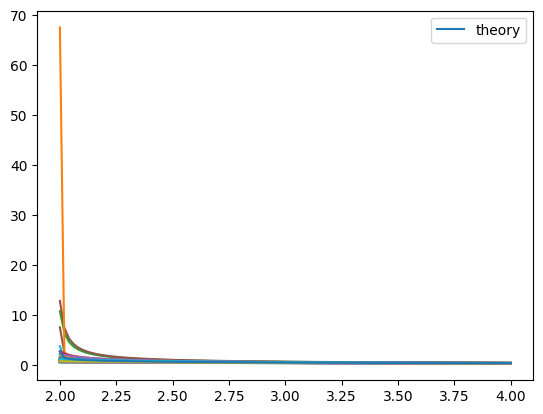

In [8]:
trails = 50
n = 16
x = np.linspace(2.0001, 4, 100)
ys, y_t = get_exp_gx(trails, n, x, multi=True)
for t in range(trails):   
    plt.plot(x, ys[t])
plt.plot(x, y_t, label='theory')
plt.legend()
plt.show()

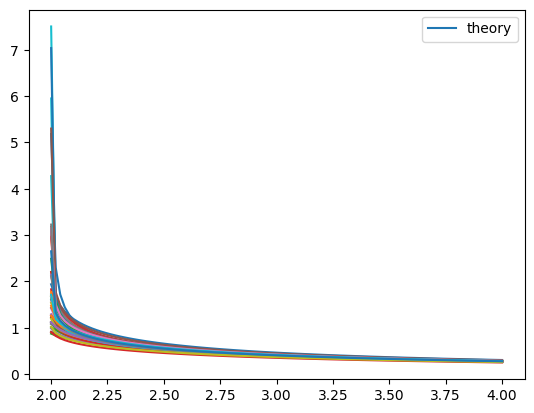

In [9]:
trails = 50
n = 256
x = np.linspace(2.0001, 4, 100)
ys, y_t = get_exp_gx(trails, n, x, multi=True)
for t in range(trails):   
    plt.plot(x, ys[t])
plt.plot(x, y_t, label='theory')
plt.legend()
plt.show()

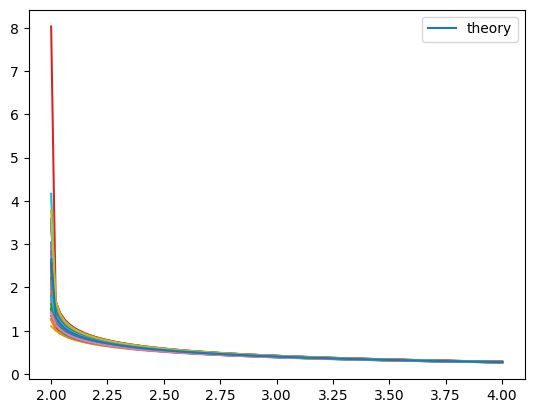

In [10]:
trails = 50
n = 1024
x = np.linspace(2.0001, 4, 100)
ys, y_t = get_exp_gx(trails, n, x, multi=True)
for t in range(trails):   
    plt.plot(x, ys[t])
plt.plot(x, y_t, label='theory')
plt.legend()
plt.show()